# Section 2. Modeling Phenomena with Random Variables and Simulating

In [1]:
## Imports

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import seaborn as sns
import scipy.stats as stats


# a) Simulating an epidemic Only S & I

Pretty straightforward first part, since there is no recovery there is no 'peak'

#### My simulation strategy consisted on:
  - having a dedicated l for the series of infected and healthy for each simulation
  - plotting each simulation and repeating the loop
  - I didnt use a list of time series because it was not needed

#### Observations:

- Explosive then diminishing infections, somewhat like f(x) = sqrt(x) or ln(x)
- No recovery therefore no peak, In all scenarios EVERYONE gets infected
- In some scenarios the 'apocalypse' happens even before reaching T = 30
- Simulations are all close to each other, little variation, presumably because no recovery?

#### Changes in p

- The smaller p gets, the more linear the model gets, and the people infected at T=30 is lower 
- The higher p gets, the more explosive infections get, and well all people get infected

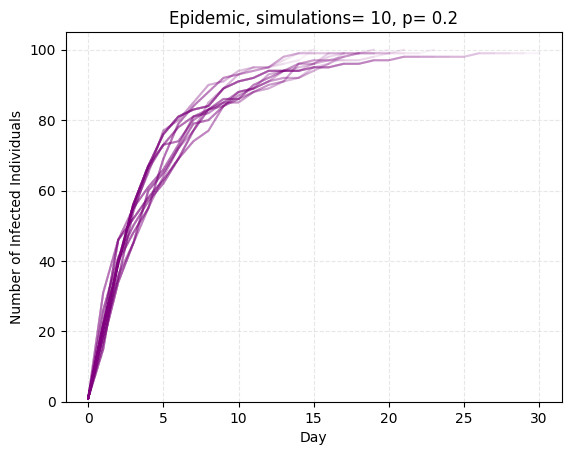

In [2]:
# Setup
prob = 0.2
population = 100
initial_infected = 1
initial_healthy = 99
days = 30
n_sims = 10


# Outermost simulation loop
for sim in range(n_sims):

  inf_timeseries = [initial_infected]
  h_timeseries = [initial_healthy]

  for day in range(days):

    infected_now = inf_timeseries[-1]
    healthy_now = h_timeseries[-1]
    if healthy_now == 0:
      break # If all are infected

    infected_today = np.random.binomial(n=healthy_now, p=prob)  # count amount of successes (total infected today) with probability p
    updated_count_h, updated_count_i = healthy_now - infected_today, infected_now + infected_today

    h_timeseries.append(updated_count_h)
    inf_timeseries.append(updated_count_i)

    plt.plot(inf_timeseries, color='purple', alpha=0.05)


plt.title(f'Epidemic, simulations= {n_sims}, p= {prob}')
plt.xlabel('Day')
plt.ylabel('Number of Infected Individuals')
plt.ylim(0, population + 5)  # Set y-axis limit
plt.grid(True, linestyle='--', alpha=0.3)



# S & I & R Epidemic model

Here things get a bit more complicated  

I had a great issue at first due to my naming conventions, I placed recovered people back to the 'healthy' pool, ignoring their immunity and the numbers went crazy

#### Procedure:

- similar to the prior simulation, just added the recovery and the list of series. 
- initial mistake of pooling recovered with healthy was the only complication


#### Observations:
- We can see the peak of infections now, this is due thanks to the recovery option
- Infections start to diminish when E(infected_t) < E(recovered_t), meaning n_healthy * p_infect < n_infected * p_recovery
- In a similar fashion, we can see how because of the above both susceptible and infected trends downwards (to 0 if given time) as recovered people are immune

#### Changing p and gamma:
- Increasing P to something like 0.2 actually ends with the disease being erradicated and everyone being recovered (mantaining gamma)
  - likely because the recovery candidate pool gets larger quicker
- I believe it would be hard to have close to all infected people since gamma and p are constant time, and as susceptible people grows smaller, recovery rates get larger than infections
- Having everyone infected is downright impossible since recovered people are immune (Except if gamma = 0, or very close)



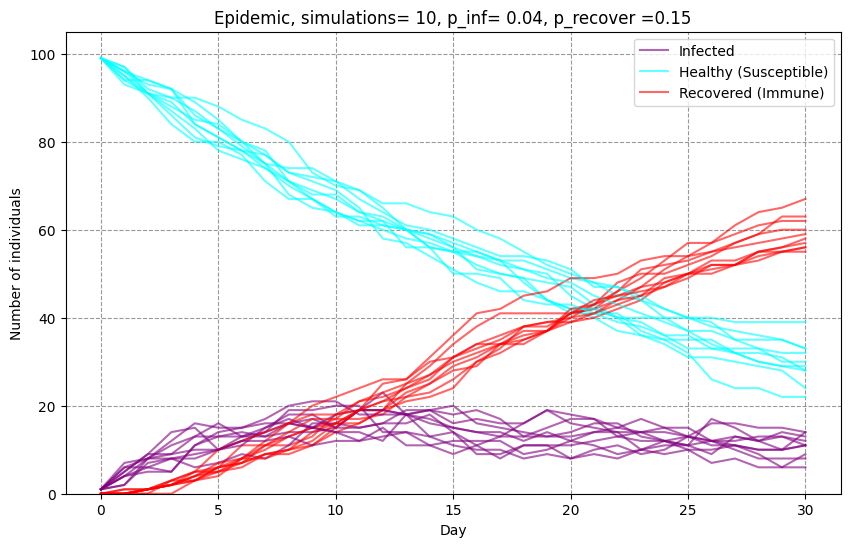

In [3]:
# Setup part a)2) S.I.R

p_inf = 0.04
p_rec = 0.15
population = 100
initial_infected = 1
initial_healthy = 99
initial_recovered = 0
days = 30
n_sims = 10


# List of series, now yes
list_h_timeseries = []
list_i_timeseries = []
list_r_timeseries = []
plt.figure(figsize= (10,6))

# Outermost simulation loops
for i in range(n_sims):

  inf_timeseries = [initial_infected]
  h_timeseries = [initial_healthy]
  r_timeseries = [initial_recovered]

  for day in range(days):
    ## Grab the latest values to run the binomials
    infected_now = inf_timeseries[-1]
    healthy_now = h_timeseries[-1]
    recovered_now = r_timeseries[-1]
    # Binomials to see how many get infected/recover
    infected_today = np.random.binomial(n=healthy_now, p=p_inf)
    recovered_today = np.random.binomial(n=infected_now, p = p_rec)
    # Update, moving recovered to their immune status
    updated_count_h = healthy_now - infected_today
    updated_count_i = infected_now + infected_today  - recovered_today
    updated_count_r = recovered_now + recovered_today
    
    # appending
    h_timeseries.append(updated_count_h)
    inf_timeseries.append(updated_count_i)
    r_timeseries.append(updated_count_r)
  # more appending
  list_h_timeseries.append(h_timeseries)
  list_i_timeseries.append(inf_timeseries)
  list_r_timeseries.append(r_timeseries)

  # Some labelling workarounds
  if i == 0:
      
      plt.plot(list_i_timeseries[i], color='purple', alpha=0.6, label='Infected')
      plt.plot(list_h_timeseries[i], color='cyan', alpha=0.6, label = 'Healthy (Susceptible)')
      plt.plot(list_r_timeseries[i], color= 'red', alpha=0.6, label = 'Recovered (Immune)')
  else:
      
      plt.plot(list_i_timeseries[i], color='purple', alpha=0.6)
      plt.plot(list_h_timeseries[i], color='cyan', alpha=0.6)
      plt.plot(list_r_timeseries[i], color= 'red', alpha=0.6)

plt.title(f'Epidemic, simulations= {n_sims}, p_inf= {p_inf}, p_recover ={p_rec}')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number of individuals')
plt.ylim(0, population + 5)  
plt.grid(True, linestyle='--', alpha=0.4, color='black')


# S.I.R with 10k individuals



Observations:

- I thought maybe the simulation was using parameters from the previous cell, but I was surprised to see a very similar evolution of the epidemic where it progressively dies out
- I believe this is still because of the immunity of recovered people and the massive difference in gamma vs p.
- Yet, when trying out different p and gammas, I still find that is quite impossible to have all people infected due to recovery rate taking over towards the end


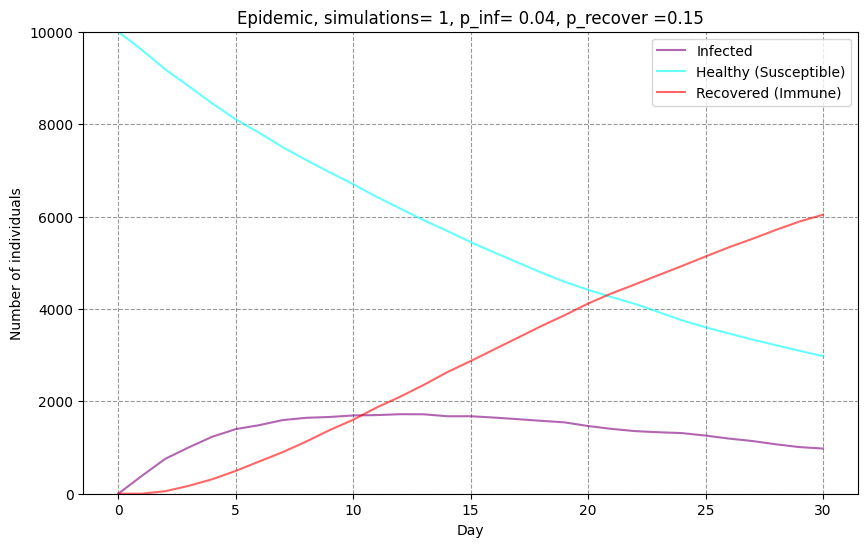

In [4]:
p_infect = 0.04
p_recover = 0.15
initial_inf = 1
initial_h = 9999
initial_r = 0
T = 30
n_sims = 1

l_h_timeseries = []
l_i_timeseries = []
l_r_timeseries = []
plt.figure(figsize= (10,6))
for i in range(n_sims):

  inf_timeseries = [initial_inf]
  h_timeseries = [initial_h]
  r_timeseries = [initial_r]


#loops

  for day in range(T):

    i_now = inf_timeseries[-1]
    h_now = h_timeseries[-1]
    r_now = r_timeseries[-1]
    if h_now == 0:
      break

    i_today = np.random.binomial(n=h_now, p= p_infect)
    r_today = np.random.binomial(n=i_now, p = p_recover)

    u_c_h = h_now - i_today
    u_c_i = i_now + i_today  - r_today
    u_c_r = r_now + r_today
    

    h_timeseries.append(u_c_h)
    inf_timeseries.append(u_c_i)
    r_timeseries.append(u_c_r)

  l_h_timeseries.append(h_timeseries)
  l_i_timeseries.append(inf_timeseries)
  l_r_timeseries.append(r_timeseries)


  if i == 0:
      
      plt.plot(l_i_timeseries[i], color='purple', alpha=0.6, label='Infected')
      plt.plot(l_h_timeseries[i], color='cyan', alpha=0.6, label = 'Healthy (Susceptible)')
      plt.plot(l_r_timeseries[i], color= 'red', alpha=0.6, label = 'Recovered (Immune)')
  else:
      
      plt.plot(l_i_timeseries[i], color='purple', alpha=0.6)
      plt.plot(l_h_timeseries[i], color='cyan', alpha=0.6)
      plt.plot(l_r_timeseries[i], color= 'red', alpha=0.6)

plt.title(f'Epidemic, simulations= {n_sims}, p_inf= {p_infect}, p_recover ={p_recover}')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number of individuals')
plt.ylim(0, 10005)
plt.grid(True, linestyle='--', alpha=0.4, color='black')

# b) Voting model with swings

note: I flipped i and j around to match numpy conventions

Procedure:

- In the first cell I set up the base lattice with the given expected probabilities
- In the second cell I set up the neighbour calculation and the simplified flipping model
- I included snapshots at 1,2, 10, 90 days


In [5]:
# 40x40 lattice

N = 40
np.random.seed(12345)
base_lattice= np.random.choice([-1,1], p=[0.7,0.3],size=( N, N))

I had a major headache with the today and tmrw voting,  

At first I was updating the same grid off which I was calculating live probabilities, so it was a mess

Eventually i came up with the today and tmrw system


#### Observations:

- Voters are more 'stubborn' to stick with their vote the higher the J (assuming they share at least 1 neighbour with the same vote)
- Higher Js will have 'clustering' in the snapshots I included, at later Ts (10,90), pretty cool
- The lower the J the more the chance to flip (if 0, pflip = 0.6 and we see popcorn)

- With respect to the snapshots across time, since the flipping chance with J = 0.2 is not really greatly reduced even when all neighbours match:
    - It is hard to see the 'nearest neighbours' pattern
    - It is way easier to detect that effect when J is higher! (but not too much)
    - I included T= 2 snapshot to see an immediate change, T =10 and T= 90 are way to distant to make any observations (randomness messes it up)

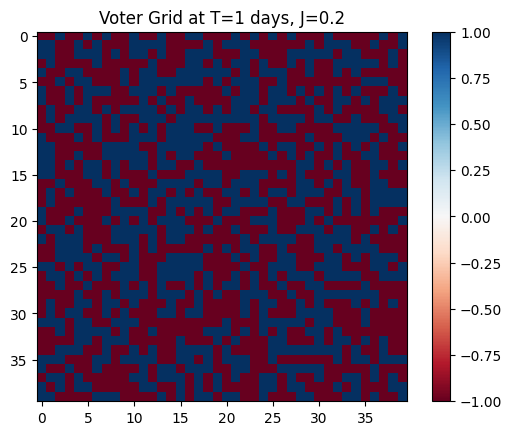

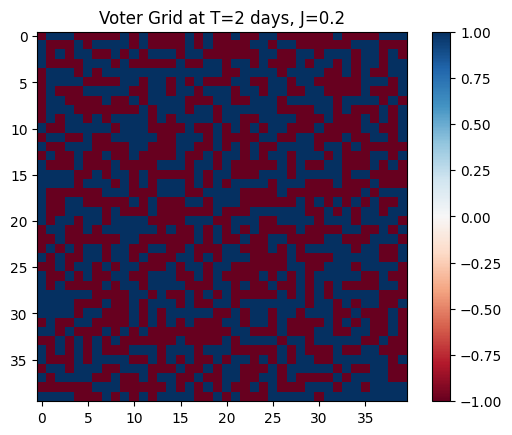

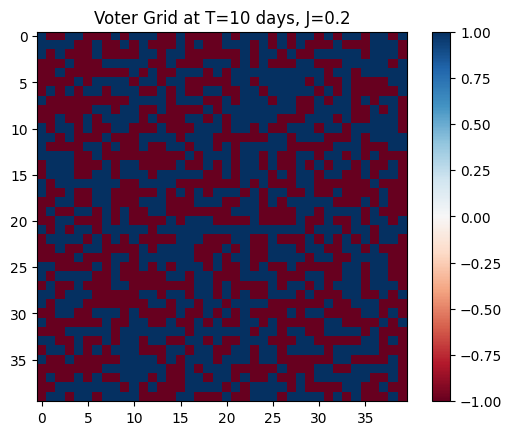

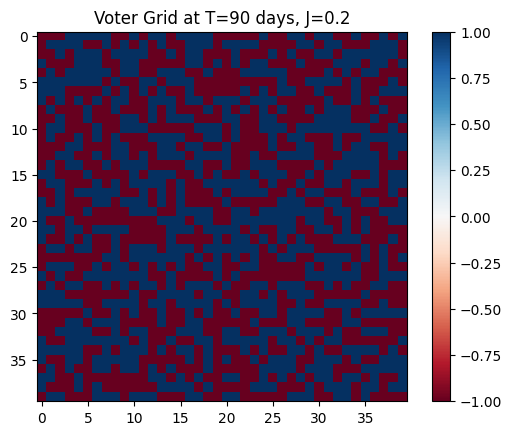

In [6]:
# Setup for i-v)

J = 0.2
t_to_plot_dict = {}

votes_today, votes_tmrw = base_lattice.copy(), base_lattice.copy()

for t in range (1,91):

  for i in range(N):
    for j in range(N):
      
      a_vote = votes_today[i,j]
      neighbours= []


      if j>0:
        neighbours.append(votes_today[i, j-1])     # Left neighbour
      if i>0:
        neighbours.append(votes_today[i-1, j])     # Top neighbour
      if j < N-1:
        neighbours.append(votes_today[i, j+1])     # Right
      if i < N-1:
        neighbours.append(votes_today[i+1,j])     #bottom 

      K , shared_votes = len(neighbours), 0

      for neigh_vote in neighbours:

        if a_vote == neigh_vote:
          shared_votes += 1
      flip_prob = 0.6 - J * (shared_votes/K)

      if np.random.binomial(1,flip_prob) == 1:
        votes_tmrw[i,j] = - a_vote 

  votes_today = votes_tmrw.copy() 
  if t in [1,2,10,90]:
    t_to_plot_dict[t] = votes_today.copy()


for day in t_to_plot_dict.keys():
  plt.imshow(t_to_plot_dict[day], cmap='RdBu' )
  plt.title (f"Voter Grid at T={day} days, J={J}")
  plt.colorbar()
  plt.show()

# New Voting Model 

Fairly straightforward, same method just adding h

Same methodology to show evolution

#### iv) Effects of H, and what would happen if h = -0.6

- H at 0.4 with this flipping criteria causes quite the opposite effect of the previous system. 
  - i.e. when all neighbours agree and J = 0.2, the probability of flipping is 0.8 (this is the minimum value pflip takes with this h=0.4), popcorn again
  
- With H at -0.6, in every case of the probability function, we will have the P(flip) would equal 0. Therefore, the voting grid would be the same as the initial assignment 70/30


#### Limitations:

- Neighbours are immediate, i.e no real effect of the neighbourHOOD is represented
- Assumption of daily reevaluation of voting preferences (not realistic)
- two candidates?

#### Suggestion for ideal voting system:

- Have a level S of voter stubborness which influences:
    - baseline P (flip)
    - sensitivity to J
    - sensitivity to neighbours
    - sensitivity to h
    - run weekly (or atleast less often) vote reevaluations (and random, not at individuals w/ same frequency)
    

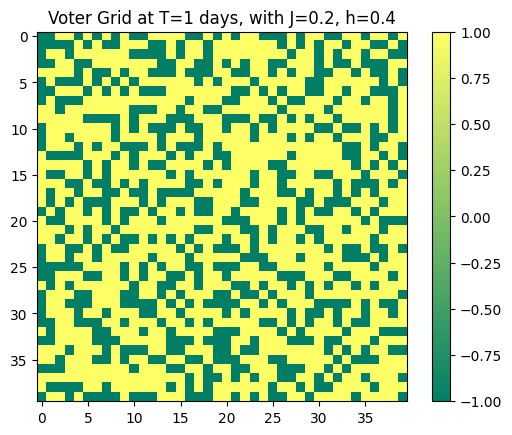

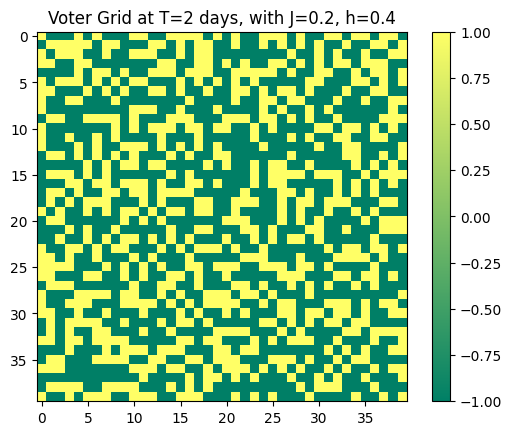

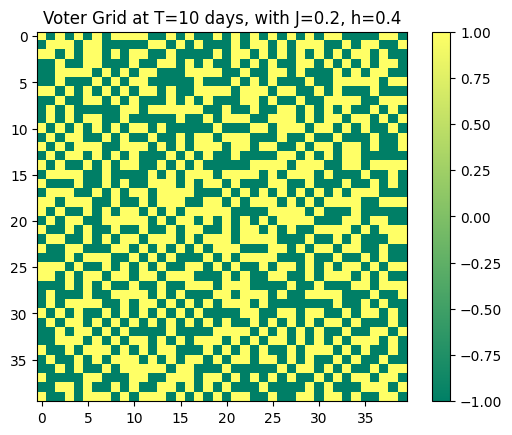

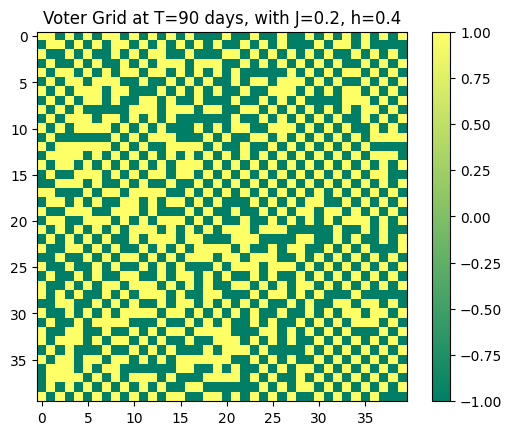

In [7]:
# Setup for vi - viii)

J= 0.2
h = 0.4
N = 40
votes_today, votes_tmrw = base_lattice.copy(), base_lattice.copy()

for t in range (1,91):
  for i in range(N):
    for j in range(N):

      a_vote = votes_today[i,j]

      neighbours= []

      if j>0:
        neighbours.append(votes_today[i, j-1])     # Left neighbour
      if i>0:
        neighbours.append(votes_today[i-1, j])     # Top neighbour
      if j < N-1:
        neighbours.append(votes_today[i, j+1])     # Right
      if i < N-1:
        neighbours.append(votes_today[i+1,j])     #bottom 


      K , shared_votes = len(neighbours), 0

      for neigh_vote in neighbours:
        if a_vote == neigh_vote:
          shared_votes += 1

      flip_prob = (0.6 - J * (shared_votes/K)) + h

      if flip_prob < 0:
        flip_prob = 0

      elif flip_prob > 1:
        flip_prob = 1

      if np.random.binomial(1, flip_prob) == 1:
        votes_tmrw[i,j] = - a_vote 


  votes_today = votes_tmrw.copy()
  
  if t in [1,2,10,90]:
    t_to_plot_dict[t] = votes_today.copy()
    
for day in t_to_plot_dict.keys():
  plt.imshow(t_to_plot_dict[day], cmap='summer')
  plt.title (f"Voter Grid at T={day} days, with J={J}, h={h}")
  plt.colorbar()
  plt.show()
